**WEB SCRAPPING WITH SPOTIFY API + IDENTIFIED CSV FILES ON LINE**

In [ ]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 KB 14.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import config
import spotipy as sp
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [ ]:
sp = sp.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [ ]:
# Some playlist identified with thousands of songs, including them in list, in case we need to use it in a loop
playlist_id= ["6sx8rpqIE3R9sfGSb8Udxy",
"5S8SJdl1BDc0ugpkEvFsIL",
"6yPiKpy7evrwvZodByKvM9",
"1G8IpkZKobrIlXcVPoSIuf",
"0wz4CO2Na2cqgVwPcfIuU0",
"5Ua4LEH1jhH89B4smIJQMW",
"5oZjXwvrbAJ29Beza3h1bn",
"7A2TXg191J1S4LPesbwSFK",
"0YnhI0DZoJBdygCRThNS2f"]

In [ ]:
playlist_id

['6sx8rpqIE3R9sfGSb8Udxy',
 '5S8SJdl1BDc0ugpkEvFsIL',
 '6yPiKpy7evrwvZodByKvM9',
 '1G8IpkZKobrIlXcVPoSIuf',
 '0wz4CO2Na2cqgVwPcfIuU0',
 '5Ua4LEH1jhH89B4smIJQMW',
 '5oZjXwvrbAJ29Beza3h1bn',
 '7A2TXg191J1S4LPesbwSFK',
 '0YnhI0DZoJBdygCRThNS2f']

In [ ]:
for id in playlist_id:
    playlist = sp.user_playlist_tracks("spotify", id)
playlist

{'href': 'https://api.spotify.com/v1/playlists/0YnhI0DZoJBdygCRThNS2f/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2021-02-17T03:49:28Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/mittecar000'},
    'href': 'https://api.spotify.com/v1/users/mittecar000',
    'id': 'mittecar000',
    'type': 'user',
    'uri': 'spotify:user:mittecar000'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1G9G7WwrXka3Z1r7aIDjI7'},
       'href': 'https://api.spotify.com/v1/artists/1G9G7WwrXka3Z1r7aIDjI7',
       'id': '1G9G7WwrXka3Z1r7aIDjI7',
       'name': 'Outkast',
       'type': 'artist',
       'uri': 'spotify:artist:1G9G7WwrXka3Z1r7aIDjI7'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      '

In [ ]:
# function to get the playlist's tracks
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [ ]:
# first extraction from first playlist
tracks=get_playlist_tracks("spotify", "6sx8rpqIE3R9sfGSb8Udxy")

In [ ]:
# extraction of the features from this playlist
list_of_audio_features=[]
for item in range(0,9999):
    list_of_audio_features.append(sp.audio_features(tracks[item]["track"]["id"])[0])

# keeping the relevant columns
df=pd.DataFrame(list_of_audio_features)    
df=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.414,0.404,-9.928,0.0499,0.2710,0.000000,0.3000,0.224,71.105,4u7EnebtmKWzUH433cf5Qv,354320
1,0.331,0.340,-14.784,0.0369,0.3130,0.607000,0.2340,0.365,126.672,21cp8L9Pei4AgysZVihjSv,619267
2,0.326,0.872,-7.602,0.1220,0.2140,0.000000,0.4610,0.492,173.381,2g7gviEeJr6pyxO7G35EWQ,508333
3,0.195,0.483,-4.991,0.0300,0.4650,0.497000,0.0686,0.173,84.710,6L5BZEcZmD6RBJnimzlyKr,269107
4,0.306,0.426,-10.943,0.0297,0.1590,0.000000,0.0867,0.326,73.220,3gE5067onHssnwibln70ef,191493
...,...,...,...,...,...,...,...,...,...,...,...
9994,0.450,0.728,-9.211,0.0418,0.6720,0.007010,0.9280,0.405,132.975,1pKpQpfBKciBycMzR8K6vH,242000
9995,0.542,0.324,-14.070,0.0329,0.5660,0.000002,0.0876,0.421,121.802,5ehVOC0zSdwWqyZlhomJSi,213533
9996,0.445,0.337,-8.485,0.0281,0.4120,0.000006,0.1260,0.381,75.041,3D9TYPbNo1nnTwE4eLKxnJ,309160
9997,0.437,0.620,-6.293,0.0279,0.0328,0.000000,0.3920,0.381,96.132,3IkJ97LnVrWGYys6WC7gLV,263600


In [ ]:
# proceeding with second playlist
tracks2=get_playlist_tracks("spotify", "6yPiKpy7evrwvZodByKvM9")

In [ ]:
list_of_audio_features2=[]
for item in range(0,9999):
    track_id = tracks2[item]["track"]["id"]
    # adding this piece of code below to avoid duplicate
    if track_id is not None:
        list_of_audio_features2.append(sp.audio_features(track_id)[0])

df2=pd.DataFrame(list_of_audio_features2)    
df2=df2[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.310,0.445,-13.355,0.0863,0.09400,0.067800,0.1130,0.122,95.360,33xMbeHzmWd6Od0BmLZEUs,152560
1,0.419,0.565,-11.565,0.0347,0.13700,0.337000,0.1280,0.648,151.277,3UnyplmZaq547hwsfOR5yy,197707
2,0.354,0.302,-13.078,0.0326,0.59000,0.070900,0.1110,0.223,123.753,1w8QCSDH4QobcQeT4uMKLm,244285
3,0.727,0.785,-6.707,0.0603,0.32500,0.126000,0.3100,0.960,129.649,7J9mBHG4J2eIfDAv5BehKA,249940
4,0.571,0.724,-5.967,0.0260,0.02310,0.003110,0.0919,0.385,116.755,1VZedwJj1gyi88WFRhfThb,278320
...,...,...,...,...,...,...,...,...,...,...,...
9912,0.541,0.830,-6.246,0.0316,0.10900,0.701000,0.1670,0.711,142.592,07CyrZF9eVd02zzIse7tZA,177987
9913,0.651,0.801,-7.340,0.0514,0.12300,0.000000,0.0825,0.776,133.769,5jzma6gCzYtKB1DbEwFZKH,200480
9914,0.811,0.647,-10.989,0.0498,0.08230,0.681000,0.0572,0.990,139.787,2fmMPJb5EzZCx8BcNJvVk4,191560
9915,0.686,0.610,-5.902,0.0262,0.19000,0.000931,0.0710,0.766,80.567,60rIdEPDrzyLiLC0icp3xz,206293


In [ ]:
# third playlist, but didn't work
tracks3=get_playlist_tracks("spotify", "0wz4CO2Na2cqgVwPcfIuU0")

In [ ]:
list_of_audio_features3=[]
for item in range(0,9999):
    track_id = tracks3[item]["track"]["id"]
    if track_id is not None:
        list_of_audio_features3.append(sp.audio_features(track_id)[0])
        if track_id is not None:
            list_of_audio_features3.append(sp.audio_features(track_id)[0])

df3=pd.DataFrame(list_of_audio_features3)    
df3=df3[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df3
# we didn't push further on the codes. We have 20k song, to which we will add other dataset

TypeError: ignored

In [ ]:
# size of first dataframe
df.shape

(9999, 11)

In [ ]:
# size of second dataframe
df2.shape

(9917, 11)

In [ ]:
# identified a csv of 114k songs
df3=pd.read_csv("dataset.csv")
df3.shape

(114000, 11)

In [ ]:
# identified a csv of 118k
df4=pd.read_csv("SpotifyAudioFeaturesApril2019.csv")
df4.shape

(118544, 11)

In [ ]:
#  dataset with 4 tables
df_final = pd.concat([df, df2, df3, df4])
df_final = df_final.drop_duplicates()

df_final.shape

(238013, 11)

In [ ]:
# identified an other dataset
df5=pd.read_csv("SpotifyFeatures.csv")
df5.shape

(225155, 11)

In [ ]:
# final ultimate dataset that we will use for the test
df_ultimate = pd.concat([df_final, df5])
df_ultimate = df_ultimate.drop_duplicates()

df_ultimate.shape

(391327, 11)

In [ ]:
# generating the csv file
df_ultimate.to_csv("spotify_project.csv")

**WORKING ON THE CLUSTERING**

In [168]:
# importing all relevant libraries
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [169]:
audio_features = pd.read_csv("spotify_project.csv")
print(audio_features.shape)
audio_features.head(5)

(391327, 11)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.414,0.404,-9.928,0.0499,0.271,0.000,0.3000,0.224,71.105,4u7EnebtmKWzUH433cf5Qv,354320.0
1,0.331,0.340,-14.784,0.0369,0.313,0.607,0.2340,0.365,126.672,21cp8L9Pei4AgysZVihjSv,619267.0
2,0.326,0.872,-7.602,0.1220,0.214,0.000,0.4610,0.492,173.381,2g7gviEeJr6pyxO7G35EWQ,508333.0
3,0.195,0.483,-4.991,0.0300,0.465,0.497,0.0686,0.173,84.710,6L5BZEcZmD6RBJnimzlyKr,269107.0
4,0.306,0.426,-10.943,0.0297,0.159,0.000,0.0867,0.326,73.220,3gE5067onHssnwibln70ef,191493.0


In [170]:
# checking if any NA value to drop
audio_features.isna().sum().sum()

5

In [171]:
# dropping the lines with NA
audio_features = audio_features.dropna(axis = 0, how = "any")
print(audio_features.shape)
audio_features.head(5)
# only 1 line

(391326, 11)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.414,0.404,-9.928,0.0499,0.271,0.000,0.3000,0.224,71.105,4u7EnebtmKWzUH433cf5Qv,354320.0
1,0.331,0.340,-14.784,0.0369,0.313,0.607,0.2340,0.365,126.672,21cp8L9Pei4AgysZVihjSv,619267.0
2,0.326,0.872,-7.602,0.1220,0.214,0.000,0.4610,0.492,173.381,2g7gviEeJr6pyxO7G35EWQ,508333.0
3,0.195,0.483,-4.991,0.0300,0.465,0.497,0.0686,0.173,84.710,6L5BZEcZmD6RBJnimzlyKr,269107.0
4,0.306,0.426,-10.943,0.0297,0.159,0.000,0.0867,0.326,73.220,3gE5067onHssnwibln70ef,191493.0


In [172]:
audio_features.describe()
# need to normalize data 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,391326.000000,391326.000000,391326.000000,391326.000000,391326.000000,391326.000000,391326.000000,391326.000000,391326.000000,3.913260e+05
mean,0.557090,0.578339,-9.775230,0.111403,0.369201,0.190317,0.213749,0.456704,119.035717,2.266152e+05
std,0.187657,0.268579,6.219144,0.163015,0.355179,0.337208,0.195128,0.266286,30.665488,1.230616e+05
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.436000,0.387000,-12.005000,0.036900,0.033300,0.000000,0.097500,0.231000,94.991000,1.714930e+05
50%,0.575000,0.615000,-7.967000,0.050400,0.239000,0.000093,0.129000,0.443000,119.754500,2.118670e+05
75%,0.698000,0.801000,-5.571000,0.101000,0.717000,0.175000,0.266000,0.670000,139.494750,2.589330e+05
max,0.996000,1.000000,4.532000,0.967000,0.996000,1.000000,1.000000,1.000000,249.983000,5.610020e+06


In [173]:
# removing the id columns
audio_features_no_id= audio_features.drop(columns="id")
audio_features_no_id

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.414,0.404,-9.928,0.0499,0.27100,0.000000,0.3000,0.2240,71.105,354320.0
1,0.331,0.340,-14.784,0.0369,0.31300,0.607000,0.2340,0.3650,126.672,619267.0
2,0.326,0.872,-7.602,0.1220,0.21400,0.000000,0.4610,0.4920,173.381,508333.0
3,0.195,0.483,-4.991,0.0300,0.46500,0.497000,0.0686,0.1730,84.710,269107.0
4,0.306,0.426,-10.943,0.0297,0.15900,0.000000,0.0867,0.3260,73.220,191493.0
...,...,...,...,...,...,...,...,...,...,...
391321,0.367,0.779,-8.334,0.0488,0.00574,0.007080,0.2880,0.7940,90.354,191827.0
391322,0.336,0.339,-14.237,0.0397,0.72400,0.608000,0.1260,0.0768,139.869,422680.0
391323,0.367,0.752,-8.134,0.0317,0.01330,0.009790,0.0658,0.4010,205.470,336907.0
391324,0.803,0.718,-6.457,0.0357,0.08200,0.000881,0.0790,0.9330,115.017,247160.0


In [174]:
# performing the normalization
scaler = StandardScaler()
scaler.fit(audio_features_no_id)
audio_features_scaled = scaler.transform(audio_features_no_id)
audio_features_scaled_df = pd.DataFrame(audio_features_scaled, columns = audio_features_no_id.columns)
display(audio_features_no_id.head())
print()
display(audio_features_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.414,0.404,-9.928,0.0499,0.271,0.000,0.3000,0.224,71.105,354320.0
1,0.331,0.340,-14.784,0.0369,0.313,0.607,0.2340,0.365,126.672,619267.0
2,0.326,0.872,-7.602,0.1220,0.214,0.000,0.4610,0.492,173.381,508333.0
3,0.195,0.483,-4.991,0.0300,0.465,0.497,0.0686,0.173,84.710,269107.0
4,0.306,0.426,-10.943,0.0297,0.159,0.000,0.0867,0.326,73.220,191493.0


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.762506,-0.649117,-0.024564,-0.377282,-0.276483,-0.564392,0.442023,-0.873887,-1.563020,1.037732
1,-1.204803,-0.887408,-0.805380,-0.457029,-0.158233,1.235686,0.103782,-0.344381,0.249019,3.190697
2,-1.231447,1.093388,0.349442,0.065008,-0.436965,-0.564392,1.267125,0.132550,1.772199,2.289245
3,-1.929529,-0.354976,0.769276,-0.499357,0.269721,0.909478,-0.743870,-1.065411,-1.119361,0.345289
4,-1.338024,-0.567205,-0.187770,-0.501197,-0.591817,-0.564392,-0.651110,-0.490840,-1.494050,-0.285404


In [175]:
# checking if normalizing worked
audio_features_scaled_df.describe()
# normalization worked

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,3.913260e+05,3.913260e+05,3.913260e+05,3.913260e+05,3.913260e+05,3.913260e+05,3.913260e+05,3.913260e+05,3.913260e+05,3.913260e+05
mean,4.977374e-16,3.521059e-15,5.209281e-16,4.269631e-15,1.752395e-15,-2.740831e-14,-4.773694e-15,-4.932368e-16,6.063494e-16,7.195079e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.968659e+00,-2.153331e+00,-8.075843e+00,-6.833884e-01,-1.039479e+00,-5.643917e-01,-1.095435e+00,-1.715089e+00,-3.881754e+00,-1.841480e+00
25%,-6.452709e-01,-7.124132e-01,-3.585337e-01,-4.570292e-01,-9.457231e-01,-5.643917e-01,-5.957614e-01,-8.475999e-01,-7.840980e-01,-4.479244e-01
50%,9.544240e-02,1.364993e-01,2.907526e-01,-3.742149e-01,-3.665784e-01,-5.641171e-01,-4.343283e-01,-5.146272e-02,2.343952e-02,-1.198444e-01
75%,7.508937e-01,8.290333e-01,6.760151e-01,-6.381452e-02,9.792224e-01,-4.542355e-02,2.677776e-01,8.010049e-01,6.671689e-01,2.626149e-01
max,2.338898e+00,1.569970e+00,2.300517e+00,5.248571e+00,1.764742e+00,2.401140e+00,4.029425e+00,2.040275e+00,4.270190e+00,4.374566e+01


In [140]:
# Saving the scaler
# saved_scaler = pickle.load(f) # if name of the pickle saved as "f"

import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler_song.pickle", "wb") as f:
    pickle.dump(scaler,f)

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

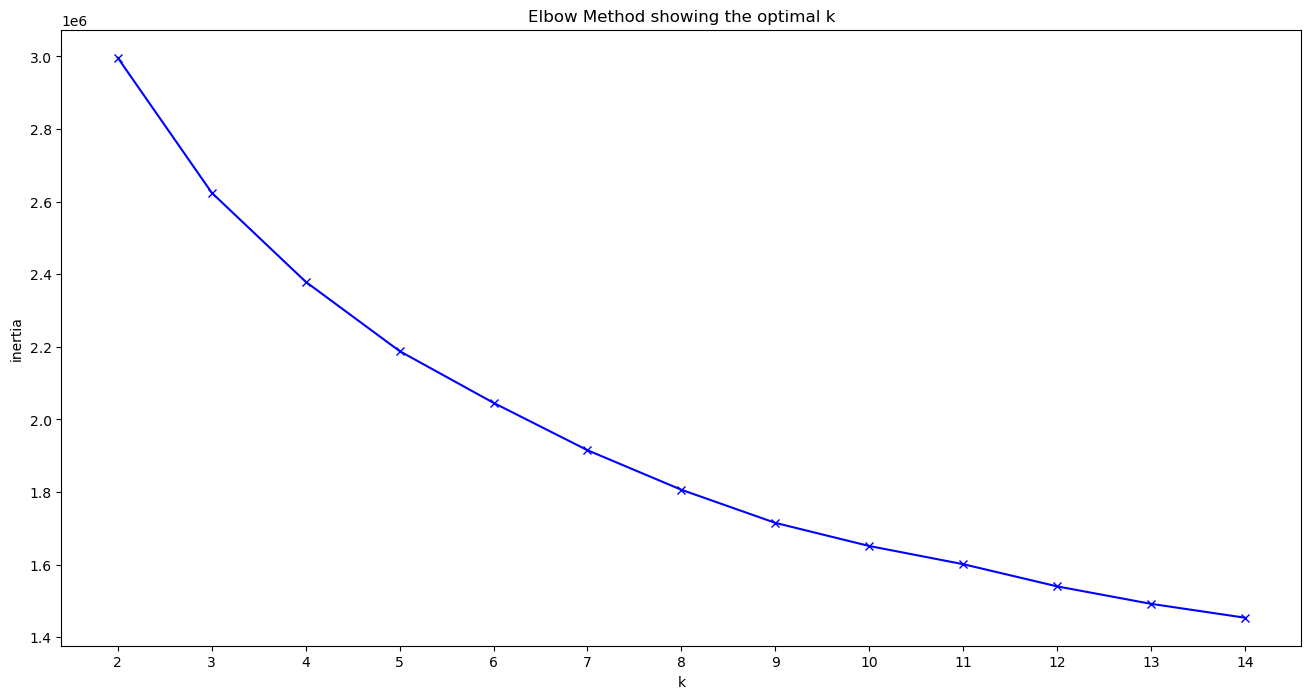

In [73]:
# determining the number of cluster
import pickle
import os

K = range(2, 15)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# We decide to got with 10 cluster based on this chart

In [75]:
# k means with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(audio_features_scaled_df)

KMeans(n_clusters=10, random_state=1234)

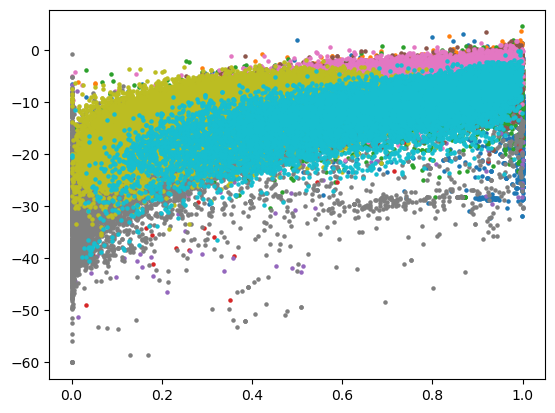

In [77]:
# assign a cluster to each 
labels = kmeans.predict(audio_features_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(audio_features.to_numpy()[row_ix, 1], audio_features.to_numpy()[row_ix, 2], s=5)
    # show the plot
pyplot.show()

In [78]:
# Number of songs per cluster
clusters = kmeans.predict(audio_features_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    22617
1    53999
2    37699
3      228
4     7838
5    71912
6    89929
7    38093
8    57621
9    11390
dtype: int64

In [176]:
audio_features["cluster"] = clusters
audio_features.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.414,0.404,-9.928,0.0499,0.27100,0.000000,0.3000,0.224,71.105,4u7EnebtmKWzUH433cf5Qv,354320.0,5
1,0.331,0.340,-14.784,0.0369,0.31300,0.607000,0.2340,0.365,126.672,21cp8L9Pei4AgysZVihjSv,619267.0,4
2,0.326,0.872,-7.602,0.1220,0.21400,0.000000,0.4610,0.492,173.381,2g7gviEeJr6pyxO7G35EWQ,508333.0,1
3,0.195,0.483,-4.991,0.0300,0.46500,0.497000,0.0686,0.173,84.710,6L5BZEcZmD6RBJnimzlyKr,269107.0,8
4,0.306,0.426,-10.943,0.0297,0.15900,0.000000,0.0867,0.326,73.220,3gE5067onHssnwibln70ef,191493.0,5
5,0.579,0.508,-9.484,0.0270,0.00574,0.000494,0.0575,0.609,147.125,40riOy7x9W7GXjyGp4pjAv,391376.0,1
6,0.487,0.382,-10.889,0.0309,0.04220,0.000005,0.4110,0.714,116.557,1H5IfYyIIAlgDX8zguUzns,261280.0,6
7,0.249,0.660,-6.905,0.0342,0.50400,0.002600,0.0891,0.435,149.813,3qitymULqEibr7yknRMKU4,248947.0,1
8,0.332,0.179,-11.830,0.0326,0.87900,0.000000,0.0886,0.315,96.529,3BQHpFgAp4l80e1XslIjNI,125667.0,8
9,0.631,0.590,-12.138,0.0297,0.00367,0.002990,0.0537,0.927,130.145,3rqXP37YkEnizabzjM7uIu,208933.0,6


In [150]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/kmeans_10.pickle", "wb") as f:
    pickle.dump(kmeans,f)

__Working on the user input and recommendation part__

In [224]:
import pickle
from IPython.display import display, IFrame, clear_output

# function to get user input and search for songs
def search_song():
    song_input = str(input("Please enter the song  that you like : "))
    results = sp.search(q=song_input, limit=20)
    return results


# function to display songs and get user feedback
def display_song(results):
    for i in range(0, 19):
        track_id = results['tracks']['items'][i]['id']
        clear_output(wait=True)
        display(IFrame(src="https://open.spotify.com/embed/track/"+track_id+"?utm_source=generator",
               width="320",
               height="80",
               frameborder="0",
               allowtransparency="true",
               allow="encrypted-media",
              ))
        good_song = str(input("Is this the song you're looking for? Answer yes or no: ")).lower()

        while good_song != "yes" and good_song != "no":
            good_song = input("Answer can be only yes or no: ").lower()

        if good_song == "yes":
            return track_id

    print("Sorry, we couldn't find the song you were looking for.")
    return None


# function to load the pickles
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")
        
        
# function to extract song features, scale them, and predict cluster
def predict_cluster(track_id):
    select_song_features = sp.audio_features(track_id)
    del select_song_features[0]['key']
    del select_song_features[0]['mode']
    del select_song_features[0]['type']
    del select_song_features[0]['uri']
    del select_song_features[0]['track_href']
    del select_song_features[0]['analysis_url']
    del select_song_features[0]['time_signature']
    
    # convert to dataframe
    song_df = pd.DataFrame(select_song_features, index=[0])
    
    # remove id for clustering
    song_df.drop(columns="id", inplace=True)
    
    # scale features
    scaler_new_song = load("Model/scaler_song.pickle")
    scaled_song_df = pd.DataFrame(scaler_new_song.transform(song_df), columns=song_df.columns)
    
    # predict cluster
    kmeans_new_song = load("Model/kmeans_10.pickle")
    cluster = kmeans_new_song.predict(scaled_song_df)[0]
    
    return cluster


# function to recommend a song from the predicted cluster
def recommend_song(cluster):
    #audio_features = pd.read_csv(audio_features.csv")
    random_from_cluster = audio_features[audio_features['cluster'] == cluster].sample()
    id_recommended = random_from_cluster['id'].values[0]
    
    return id_recommended


# function to display the recommended song
def display_recommended_song(id_recommended):
    print("""
    
Here is our recommendation for a similar song :""")
    display(IFrame(src="https://open.spotify.com/embed/track/"+id_recommended+"?utm_source=generator",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      ))

    
# main function to run the entire program
def main():
    results = search_song()
    track_id = display_song(results)

    if track_id is not None:
        cluster = predict_cluster(track_id)
        id_recommended = recommend_song(cluster)
        display_recommended_song(id_recommended)

# run the program
main()

Is this the song you're looking for? Answer yes or no: yes

    
Here is our recommendation for a similar song :
